In [56]:
#https://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
import numpy as np
import pandas as pd
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn import datasets
from sklearn import metrics
from sklearn import tree

#import sklearn # это библиотека машинного обучения

In [57]:
#Импорт данных
balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
                           sep= ',', header= None)

In [58]:
print "Dataset Lenght:: ", len(balance_data)
print "Dataset Shape:: ", balance_data.shape

Dataset Lenght::  625
Dataset Shape::  (625, 5)


In [59]:
print "Dataset:: "
balance_data.head()

Dataset:: 


,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [60]:
#Разделение данных для разделения данных на обучающие и тестовые наборы.
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]
#Делим данные на набор функций и набор целей. Набор «X» состоит из переменных-предикторов. 
#Он состоит из данных от 2-го столбца до 5-го столбца. Набор «Y» состоит из переменной результата. 
#Он состоит из данных в 1-м столбце. 
#Мы используем «.values» numpy, преобразуя наши фреймы данных в numpy массивы.

In [30]:
sklearn.__version__

'0.20.1'

In [61]:
#Разделим наши данные на обучающие и тестовые наборы. Мы будем использовать метод train_test_split () от sklearn.
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( X, Y, test_size = 0.3, random_state = 100)
#Переменная random_state - это состояние генератора псевдослучайных чисел, используемого для случайной выборки.

In [ ]:
"""
DecisionTreeClassifier (): это функция классификатора для DecisionTree. 
Это основная функция для реализации алгоритмов. Некоторые важные параметры:
критерий:  определяет функцию измерения качества разделения. Sklearn поддерживает критерии «Джини» для индекса Джини и «энтропию» для получения информации. По умолчанию он принимает значение «Джини».
разделитель: определяет стратегию выбора разделения в каждом узле. Поддерживает «лучшее» значение для выбора лучшего разделения и «случайное» для выбора лучшего случайного разделения. По умолчанию он принимает «лучшее» значение.
max_features:  он определяет нет. из особенностей, чтобы рассмотреть, ища лучший раскол. Мы можем ввести целое число, число с плавающей запятой, строку и значение None.
Если вводится целое число, то это значение считается максимальным для каждого разбиения.
Если берется значение с плавающей запятой, то оно показывает процент объектов при каждом разделении.
Если выбрано «auto» или «sqrt», то max_features = sqrt (n_features).
Если выбрано «log2», то max_features = log2 (n_features).
Если нет, то max_features = n_features. По умолчанию он принимает значение «Нет».

max_depth:  параметр max_depth обозначает максимальную глубину дерева. Может принимать любое целочисленное значение или нет. Если None, то узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать меньше чем min_samples_split samples. По умолчанию он принимает значение «Нет».
min_samples_split:  выше минимального значения. образцов требуется разделить внутренний узел. Если целочисленное значение взято, тогда рассмотрите min_samples_split как минимальное нет. Если float, то он показывает процент. По умолчанию он принимает значение «2».
min_samples_leaf: минимальное количество выборок, которое требуется для конечного  узла. Если целочисленное значение взято, тогда рассмотрите min_samples_leaf как минимальное нет. Если float, то он показывает процент. По умолчанию он принимает значение «1».
max_leaf_nodes: определяет максимальное количество возможных конечных узлов. Если None, то требуется неограниченное количество конечных узлов. По умолчанию он принимает значение «Нет».
min_impurity_split: определяет порог ранней остановки роста дерева. Узел разделится, если его примесь выше порога, в противном случае это лист.
"""

In [62]:
#Построим классификаторы, используя критерий как индекс Джини и получение информации. 
#Нам нужно подогнать наш классификатор, используя fit (). Построим визуализацию нашего классификатора дерева решений.
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [63]:
#2 вариант построения
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [34]:
#мы смоделировали 2 классификатора. Один классификатор с индексом Джини и другой с получением информации в качестве критерия. 
#Мы готовы прогнозировать классы для нашего тестового набора.
clf_gini.predict([[4, 4, 3, 3]])

array(['R'], dtype=object)

In [64]:
y_pred = clf_gini.predict(X_test)
y_pred

array(['R', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'L',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L

In [65]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R', 'R

In [37]:
#Расчет показателя точности
"""
Под точностью мы понимаем отношение правильно спрогнозированных точек данных ко всем спрогнозированным точкам данных. 
Точность как метрика помогает понять эффективность нашего алгоритма. Требуется 4 параметра.
y_true,
y_pred,
нормализуют,
sample_weight.
Из этих 4 normalize и sample_weight являются необязательными параметрами. 
Параметр y_true принимает массив правильных меток, а y_pred принимает массив предсказанных меток, 
которые возвращаются классификатором. Возвращает точность как значение с плавающей точкой.
"""
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Accuracy is  73.40425531914893


In [38]:
print "Accuracy is ", accuracy_score(y_test,y_pred_en)*100

Accuracy is  70.74468085106383


In [54]:
with open("clf_gini.txt", "w") as f:
    f = tree.export_graphviz(clf_gini, out_file=f)

In [ ]:
"""
clf_gini.txt

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.5\ngini = 0.572\nsamples = 437\nvalue = [36, 203, 198]"] ;
1 [label="X[1] <= 1.5\ngini = 0.446\nsamples = 165\nvalue = [13, 117, 35]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 2.5\ngini = 0.532\nsamples = 27\nvalue = [4, 6, 17]"] ;
1 -> 2 ;
3 [label="gini = 0.653\nsamples = 12\nvalue = [4, 5, 3]"] ;
2 -> 3 ;
4 [label="gini = 0.124\nsamples = 15\nvalue = [0, 1, 14]"] ;
2 -> 4 ;
5 [label="X[0] <= 1.5\ngini = 0.332\nsamples = 138\nvalue = [9, 111, 18]"] ;
1 -> 5 ;
6 [label="gini = 0.637\nsamples = 25\nvalue = [5, 9, 11]"] ;
5 -> 6 ;
7 [label="gini = 0.18\nsamples = 113\nvalue = [4, 102, 7]"] ;
5 -> 7 ;
8 [label="X[3] <= 2.5\ngini = 0.534\nsamples = 272\nvalue = [23, 86, 163]"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="X[0] <= 1.5\ngini = 0.559\nsamples = 110\nvalue = [11, 62, 37]"] ;
8 -> 9 ;
10 [label="gini = 0.37\nsamples = 27\nvalue = [3, 3, 21]"] ;
9 -> 10 ;
11 [label="gini = 0.448\nsamples = 83\nvalue = [8, 59, 16]"] ;
9 -> 11 ;
12 [label="X[0] <= 3.5\ngini = 0.368\nsamples = 162\nvalue = [12, 24, 126]"] ;
8 -> 12 ;
13 [label="gini = 0.133\nsamples = 100\nvalue = [3, 4, 93]"] ;
12 -> 13 ;
14 [label="gini = 0.592\nsamples = 62\nvalue = [9, 20, 33]"] ;
12 -> 14 ;
}

Далее идем на сайт http://webgraphviz.com/ и заганяем туда txt
Получаем:

"""

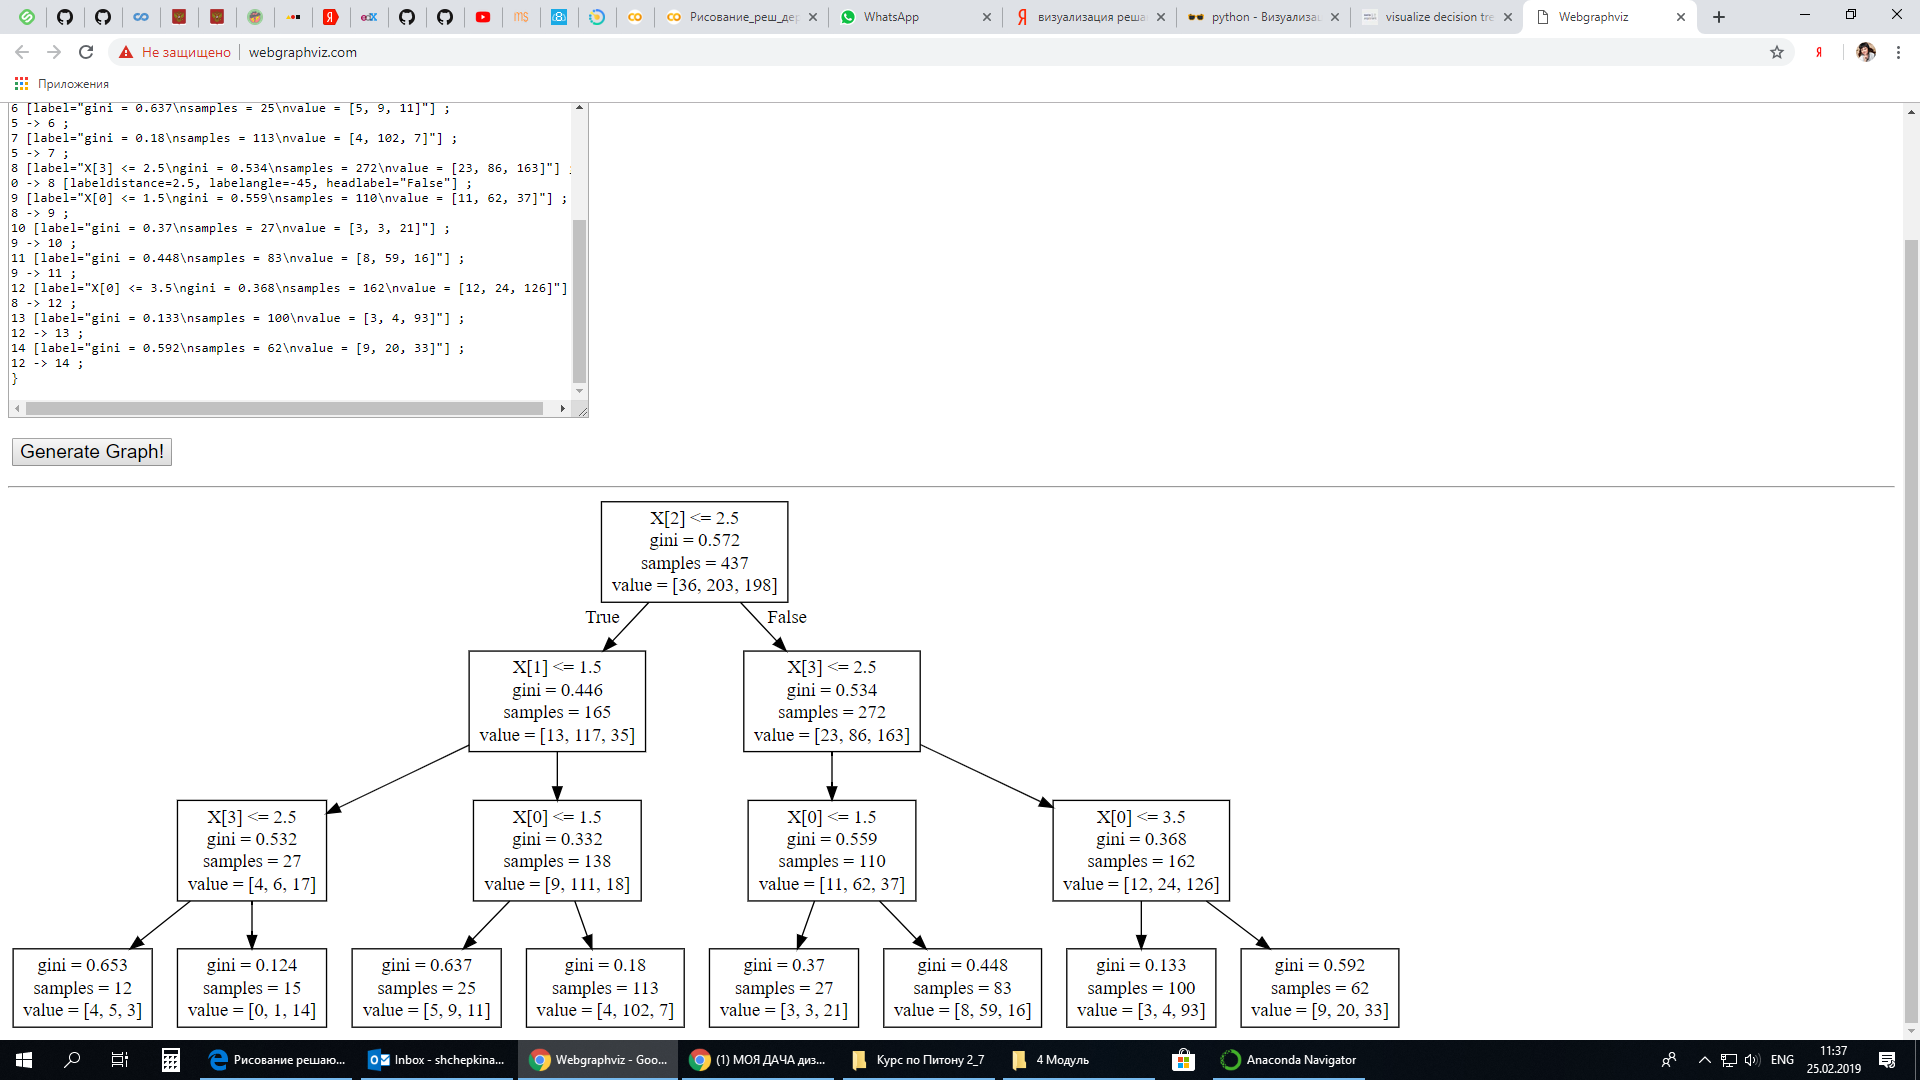

In [44]:
X[2]

array([1L, 1L, 1L, 3L], dtype=object)

In [49]:
# converting into the pdf file
"""
with open("fruit_classifier", "w") as f:
    f = tree.export_graphviz(clf_gini, out_file=f)
"""

In [52]:
#dot -Tpdf fruit_classifier.dot -o fruit_classifier.pdf

In [53]:
#open -a preview fruit_classifier.pdf

In [66]:
with open("clf_entropy.txt", "w") as f:
    f = tree.export_graphviz(clf_entropy, out_file=f)

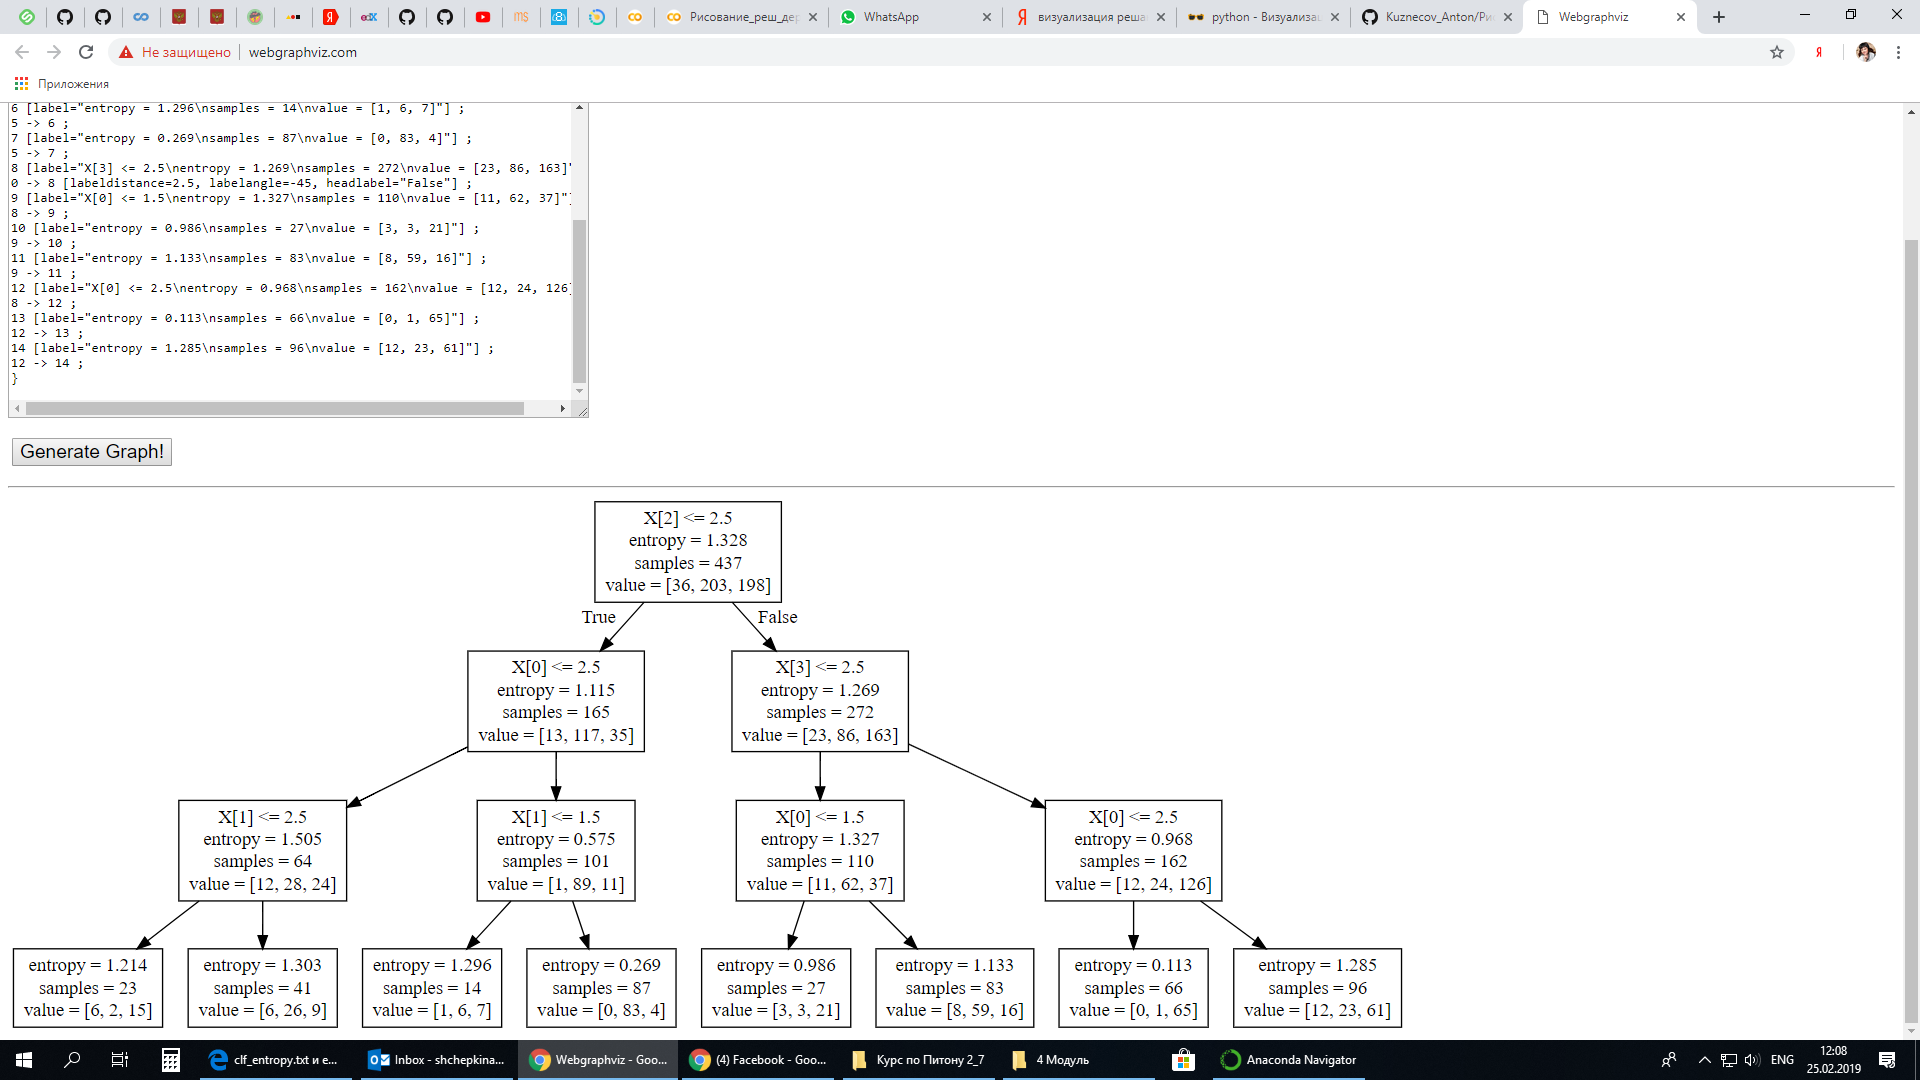

In [68]:
from graphviz import Source
Source( tree.export_graphviz(clf_gini, out_file=None, feature_names=X.columns))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [69]:
#Интерпретация деревьев
# https://itnan.ru/post.php?c=1&p=426771

#Важности признаков
#Важности признаков позволяют увидеть связь каждого признака с целью прогнозирования. 
# model is the trained model
importances = clf_gini.feature_importances_
importances

array([0.31271236, 0.12566943, 0.29232211, 0.2692961 ])

In [ ]:
#Визуализация графов в Ноутбуке
# http://qaru.site/questions/382839/visualizing-decision-tree-in-scikit-learn
